# CIS435 Final Project

Introduction

In [1]:
import numpy as np
import pandas as pd

### Data Understanding

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [21]:
yelp.duplicated().any()

False

In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
print(yelp['stars'].value_counts())

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64


#### What is the length of the review?
It is possible to derive the length of the review and add it to the dataset for analysis.

In [6]:
yelp['text length'] = yelp['text'].apply(len)

In [7]:
print(yelp['text length'].max(),yelp['text length'].min())

4997 1


### Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

**What is the distribution of ratings?**

<AxesSubplot:xlabel='stars', ylabel='count'>

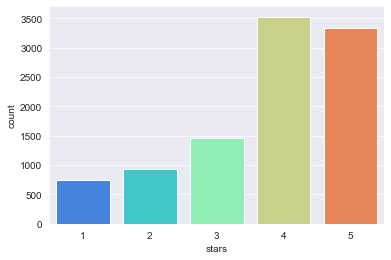

In [9]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

#### Is text length related to rating?

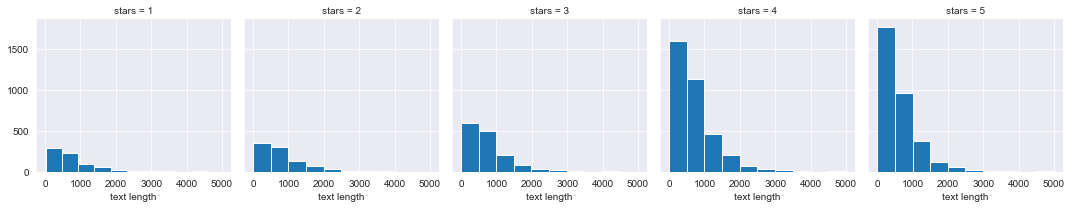

In [20]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

<AxesSubplot:xlabel='stars', ylabel='text length'>

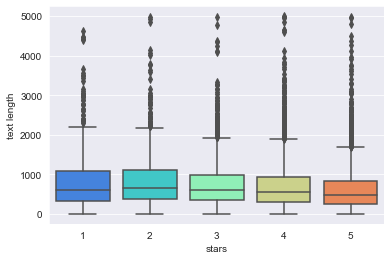

In [21]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

#### Do users react differently (cool, funny, useful) to ratings (1,2,3,4,5)?

In [23]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


#### Are reactions correlated with text length?

In [24]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

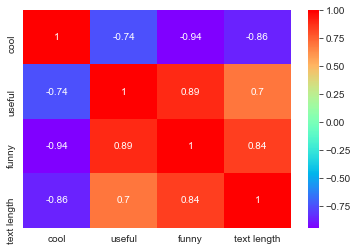

In [26]:
sns.heatmap(stars.corr(),cmap='rainbow',annot=True)

## Machine Learning Model
Machine learning models will make a binary classification of positive or negative review. We prepare the datasets by using the stars 1 and 5 as labels for negative and positive in supervised learning.  

In [10]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [11]:
#The feature trained (X) will be text, and the labels (y) stars.
X = yelp_class['text']
y = yelp_class['stars']

**Vectorize the Text Data**

In [12]:
#Text data must be vectorized prior to modeling.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [13]:
X = cv.fit_transform(X)

**Create the Train and Test Datasets**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Create and Train the Model**

In [16]:
from sklearn.naive_bayes import MultinomialNB
#Instantiate the model.
nb = MultinomialNB()

In [17]:
#Fit the model.
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Predict and Evaluate**

In [18]:
predictions = nb.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



**The Naive Bayse model will be compared to the Recurrent Neural Network (RNN) using Tensorflow in Google Cloud Platform AutoML.**

In [26]:
print(len(y), len(y_train), len(y_test))

4086 2860 1226


## Topic Frequencies

In [28]:
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [31]:
#Isolate negative reviews
neg_text = yelp[yelp['stars']==1]['text']

In [34]:
#Convert text to lower case
neg_text = neg_text.str.lower()

In [36]:
#Split text into comma-separated arrays.
neg_text = neg_text.str.split(' ')

In [37]:
#Build the text corpus by joining all records
all_neg_text = []
for text in neg_text:
    text = [x.strip(string.punctuation) for x in text]
    all_neg_text.append(text)

#The result is a comma separated list of words per review
all_neg_text[0]

['u',
 'can',
 'go',
 'there',
 'n',
 'check',
 'the',
 'car',
 'out',
 'if',
 'u',
 'wanna',
 'buy',
 '1',
 'there',
 "that's",
 'wrong',
 'move',
 'if',
 'u',
 'even',
 'want',
 'a',
 'car',
 'service',
 'from',
 'there',
 'u',
 'made',
 'a',
 'biggest',
 'mistake',
 'of',
 'ur',
 'life',
 'i',
 'had',
 '1',
 'time',
 'asked',
 'my',
 'girlfriend',
 'to',
 'take',
 'my',
 'car',
 'there',
 'for',
 'an',
 'oil',
 'service',
 'guess',
 'what',
 'they',
 'ripped',
 'my',
 'girlfriend',
 'off',
 'by',
 'lying',
 'how',
 'bad',
 'my',
 'car',
 'is',
 'now',
 'if',
 'without',
 'fixing',
 'the',
 'problem',
 'might',
 'bring',
 'some',
 'serious',
 'accident',
 'then',
 'she',
 'did',
 'what',
 'they',
 'said',
 '4',
 'brand',
 'new',
 'tires',
 'timing',
 'belt',
 '4',
 'new',
 'brake',
 'pads',
 'u',
 'know',
 "why's",
 'the',
 'worst',
 'all',
 'of',
 'those',
 'above',
 'i',
 'had',
 'just',
 'changed',
 '2',
 'months',
 'before',
 'what',
 'a',
 'trashy',
 'dealer',
 'is',
 'that',
 '

In [38]:
#Next join the words
beta_neg_text = [' '.join(text) for text in all_neg_text]

#The result is a reassembled review without punctuation
beta_neg_text[0]

"u can go there n check the car out if u wanna buy 1 there that's wrong move if u even want a car service from there u made a biggest mistake of ur life i had 1 time asked my girlfriend to take my car there for an oil service guess what they ripped my girlfriend off by lying how bad my car is now if without fixing the problem might bring some serious accident then she did what they said 4 brand new tires timing belt 4 new brake pads u know why's the worst all of those above i had just changed 2 months before what a trashy dealer is that people better off go somewhere"

In [39]:
#Next join the cleaned reviews in a single corpus
final_neg_text = ' '.join(beta_neg_text)

#The first 500 words in the corpuse are:
final_neg_text[:500]

"u can go there n check the car out if u wanna buy 1 there that's wrong move if u even want a car service from there u made a biggest mistake of ur life i had 1 time asked my girlfriend to take my car there for an oil service guess what they ripped my girlfriend off by lying how bad my car is now if without fixing the problem might bring some serious accident then she did what they said 4 brand new tires timing belt 4 new brake pads u know why's the worst all of those above i had just changed 2 m"

In [43]:
#Generate the wordcloud excluding stopwords
stopwords = set(STOPWORDS)
neg_cloud = WordCloud(stopwords = stopwords,
                      background_color="white",
                    max_font_size=50, 
                      max_words=100).generate(final_neg_text)

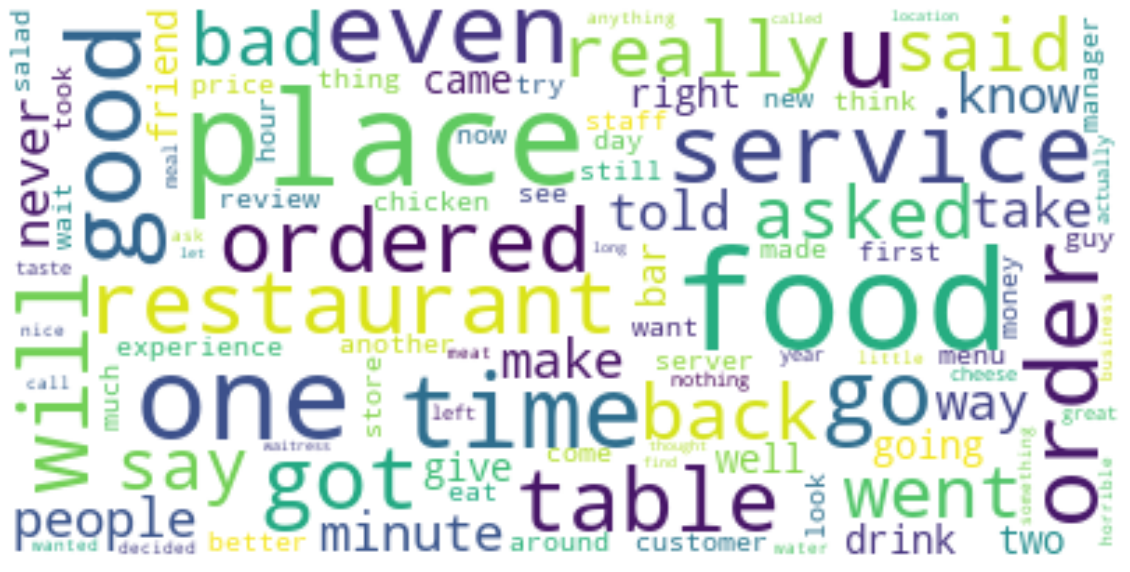

In [44]:
#Plot the cloud
plt.figure(figsize = (20,20))
plt.imshow(neg_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
#Get the frequency table of the 30 most common words
filtered_words = [word for word in final_neg_text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

word_count = {}

for letter, count in counted_words.most_common(30):
    word_count[letter] = count
    
for i,j in word_count.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: food, count: 564
Word: place, count: 485
Word: one, count: 388
Word: service, count: 309
Word: back, count: 308
Word: go, count: 297
Word: good, count: 292
Word: time, count: 289
Word: us, count: 284
Word: even, count: 277
Word: will, count: 263
Word: never, count: 237
Word: minutes, count: 214
Word: got, count: 204
Word: ordered, count: 202
Word: order, count: 199
Word: went, count: 190
Word: really, count: 190
Word: said, count: 186
Word: asked, count: 175
Word: going, count: 173
Word: restaurant, count: 172
Word: told, count: 172
Word: people, count: 171
Word: bad, count: 165
Word: first, count: 162
Word: another, count: 154
Word: way, count: 151
Word: came, count: 151
Word: right, count: 143


In [51]:
frequency_table = pd.DataFrame.from_dict(word_count,
                                        orient='index')

## Ratings over time

In [56]:
#Start with a segment of reviews for a single business.
time_series = yelp[yelp['business_id'] == 'qjmCVYkwP-HDa35jwYucbQ']

In [62]:
#Sort by date
time_series = time_series.sort_values(by='date')
time_series[:5]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
3830,qjmCVYkwP-HDa35jwYucbQ,2009-01-10,5HLUbZHJpWvz9DndacoWTw,3,"Ok first off, with the demise of Soma and the ...",review,YoBgKOdfpGH48LpIDSfoQQ,4,5,3,920
8445,qjmCVYkwP-HDa35jwYucbQ,2009-04-16,QInmZS5p7jF85RwLTsWYYw,5,If you're willing to run out for lunch a littl...,review,63HOmdiJzMOw9figAu14QQ,1,2,1,334
8037,qjmCVYkwP-HDa35jwYucbQ,2009-07-06,VXZz5o0Fv_hByWp2o6fOSw,4,True Food Kitchen claims to not be a health-fo...,review,OQMOgqS1NFIyAW4i66iDYA,0,0,0,2259
6996,qjmCVYkwP-HDa35jwYucbQ,2009-11-04,McgTbfkTEai9y3vmfBpBXw,3,My wife wanted to go here a few weeks back for...,review,XpejQYZqVcYGX7fYuYHzSw,0,0,0,895
7432,qjmCVYkwP-HDa35jwYucbQ,2009-11-18,Qya9Tv2yuVYgCt0jsV1HyA,1,What happened to this place? The first time I...,review,xnjqnfOl_5JRq_mouPxEbA,0,0,0,989


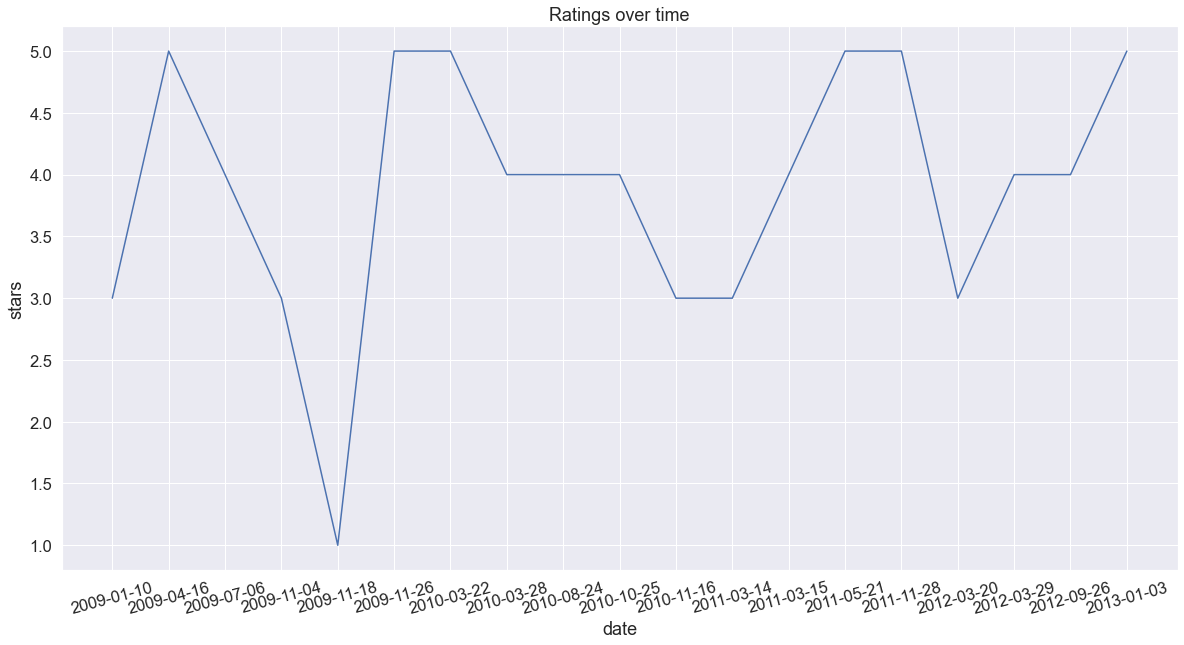

In [63]:
plt.figure(figsize = (20,10))
sns.set(font_scale=1.5)
sns.lineplot(x='date',y='stars',data=time_series)
plt.xticks(rotation=15)
plt.title('Ratings over time')
plt.show()